In [1]:
from IPython.display import Image

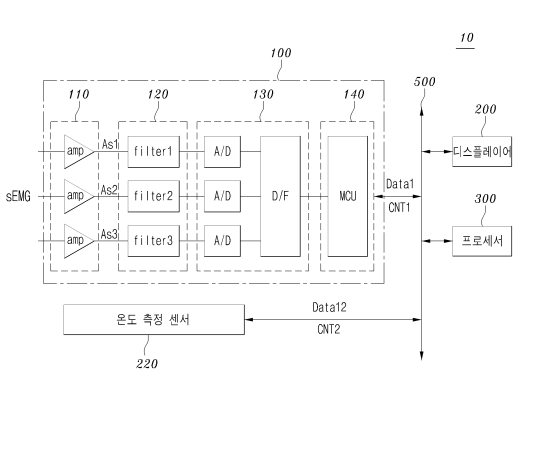

In [2]:
Image("C:/Users/jy990/Study/EMG/Image/3.1.PNG")

3개의 입력 채널에서 데이터가 들어온다고 해보자. 3개의 입력 채널 각각은 외부에서 입력되는 사용자의 신호(**sEMG**)를 증폭하도록 차동 증폭기(**amp**)와 접속된다. sEMG가 수십~수백 $uV$의 미세 신호이므로 보다 정확한 신호 감지 및 감지된 데이터를 손실 없이 전달하기 위함이다.  

sEMG는 근육 표면으로부터 근섬유를 따라 일어나는 전기적 신호로, 0.1$Hz$부터 500$Hz$까지 넓은 주파수 대역을 포함하고 있으머, 주파수 대역에 따라 As1에서 s3까지 나눌 수 있다. 예를 들어 As1(제 1신호)는 저주파 대역 신호로, 호흡과 몸을 움직일 때 주로 발생한다. 제2신호는 고주파 대역 신호로, 근육에 얼마나 많은 힘을 줬는지, 팔다리를 얼마나 움직였는지 분석하는데 이용된다. 제3신호는 심전도의 Q,R,S 파형을 포함한 1에서 50$Hz$ 대역 신호만 추출한 후 심전도 파형 추출 알고리즘을 이용해 일정 구간 동안의 심전도 파형 R 정점(R-peak) 개수를 계산해 심장 박동수를 분석하는데 이용된다.  

신체로부터 감지되는 서로 다른 미세 주파수 신호 As1에서 As3를 필터링하도록 3개의 필터를 둘 수 있다. 제1필터는 저대역 필터(Low-pass filter), 제2필터는 고대역 통과 필터(High-pass filter), 제3필터는 대역 통과 필터(Band-pass filter)로 둘 수 있다. 제1필터는 0에서 1$Hz$, 제2필터는 30$Hz$ 이상, 제3필터는 1~50$Hz$를 담당한다고 볼 수 있다.  

그리고 필터링된 신호는 아날로그 신호인데, 아날로그 디지털 변환기(Analog Digital Converter ; A/D) 및 디지털 주파수 변환기(Digital Frequency Converter ; D/F)를 이용해 **디지털 신호로 변환해 다음 단계로 전송**한다.  

데이터 처리부는 **마이크로컨트롤러(Microontroller Unit ; MCU)** 가 될 수 있고, 출력된 디지털 신호를 운동량으로 변환시켜주는 알고리즘 및 운동량에 따라 소모된 칼로리량을 계산하는 알고리즘이 있어 이 알고리즘으로 변환시킨 데이터를 다음 인터페이스로 전달한다. 또 데이터 처리부 안에는 데이터를 저장할 수 있는 메모리도 포함된다.  

디스플레이어는 LCD(Liquid Crystal Display)나 OLED(Organic Light Emiting Diodes) 등의 모듈이 될 수 있다.  

인터페이스는 무선 사설망을 쓸 수 있다. 다수의 통신 모듈과 연계될 수 있으며 다수의 통신 모듈은 지그비(Zigbee), 블루투스 및 UART 통신 방식을 이용해 구동된다.  

참고로 지그비는 근거리 무선 네트워크 표준 중 하나로 가정된다. 사무실 등 장소가 국소 지역에서 근거리 통신과 유비쿼터스 컴퓨팅을 구현하는 무선 사설망(Wireless Personal Area Networks ; WPAN) 기술 중 하나이다.

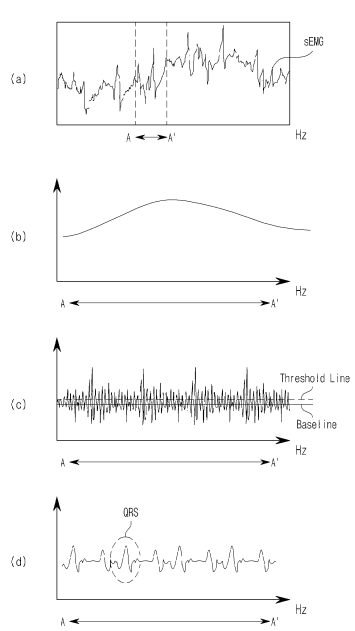

In [3]:
Image("C:/Users/jy990/Study/EMG/Image/3.2.PNG")

생체 신호 (a)를 주파수 대역별 (b), (c), (d)로 분류한 파형도는 위와 같다. **(a)** 는 sEMG 파형도 그래프고, **(b)** 는 저대역 필터로 고주파 성분을 제거한 sEMG의 baseline을 그린 것이다. 이때 baseline 기울기를 특정 시간마다 계산해 사용자와의 호흡과 움직임을 측정하며, 기울기가 클수록 호흡 및 움직임이 크다는 것을 말한다.  

**(c)** 는 고대역 필터를 통과시킨 sEMG 신호다. 저주파 성분이 제거되었기에 baseline이 모두 0으로 정렬되고, 0을 기준으로 threshold line을 정의해 고주파 성분의 크기 및 개수를 파악할 수 있다. 고주파 성분 또한 그 크기는 움직임의 정도를 나타낸다.  

**(d)** 는 대역통과 필터를 이용해 sEMG 중 심박동의 주파수(Q, R, S) 파형도를 나타낸 것이다. 다라서 3가지 주파수 신호를 이용해 사용자의 소모된 운동량 및 소모된 운동량에 따른 칼로리량을 분석할 수 있다.  

예를 들어, 저주파 대역 신호에서 추출된 값이 작고 고주파 대역 신호에서 추출된 값이 크면 근육의 길이가 변하지 않고 수축을 하는 운동 형태인 등척성 운동, 근육의 길이를 변화하면서 힘을 발생하는 등장성 운동, 이 둘이 결합한 형태인 등속성 운동 등으로 분류할 수 있고, 그 크기를 몸무게, 나이 등에 따라 운동량으로 계산해 칼로리로 환산해줄 수 있다.  

참고로 근전도는 sEMG를 측정해 사용자가 운동이나 일상 생활을 할 때 발생하는 미세한 근육 신호를 2에서 5$V$까지 증폭하고, 근전도에 따른 운동량 분석을 위해 사용자 신체 신호를 3가지 주파수 대역 신호로 분류하는 것이다.

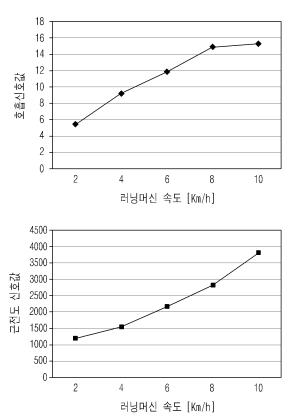

In [4]:
Image("C:/Users/jy990/Study/EMG/Image/3.3.PNG")

위는 러닝머신을 이용해 운동량 측정 실험을 한 것이다. 속도가 증가함에 따라 호흡과 관련된 저주파 신호, 근육 운동과 관련된 신체 신호 중 근전도 신호를 측정했다.  

예를 들어 러닝머신 구간 2km에서 10km까지 환경을 설정하고 매 구간 2km씩 증가시키면서 호흡과 관련된 저주파 신호와 근육의 운동과 관련된 근전도 신호를 측정해 데이터 변화량을 측정하면, 러닝머신 속도가 증가할수록 신체신호 중 근전도 신호가 증가하는 것을 확인할 수 있었다.  

호흡 관련 정보는 저주파 신호 변화값의 평균이고, 움직임 관련 정보는 근육을 얼마나 많이 움직였는가를 추출한 값이다.  

러닝머신 속도가 증가할수록 호흡과 근전도 측정값이 증가하지만, 운동량 측정값은 비선형적인 형태를 보인다. 이유는 몸의 컨디션 혹은 개인차에 의해 나타나는 특성으로 보이며, 따라서 측정된 데이터는 절댓값이 아니라 현재 몸의 상태 혹은 개인에 따른 상대값으로 분석하는 것이 바람직하다.

요약하면, sEMG를 운동량 측정 장치로 수신해 필터링한 후 주파수 대역별로 분류한다. 분류된 주파수 신호를 A/D를 통해 디지털 신호로 변환한 뒤 인터페이스로 전송한다.  

즉 측정 단계는 sEMG를 수신해 필터링하는 단계를 거쳐 필터링된 신호를 주파수 대역별로 분류해 디지털 컨버터로 전송하는 단계 전체를 말하며, 전송된 주파수 신호들은 A/D 및 D/F를 통해 디지털 신호로 변환된다.  

그러고 나서 분석 단계에서는 데이터 처리부 내에 미리 작성된 운동량 변환 알고리즘 및 칼로리 변환 알고리즘에 따라 디지털 신호 각각을 그에 따라 소모된 운동량 및 소모 칼로리량으로 분석한다.  

표시 단계는 운동량 측정 센서, 온도 측정 센서로부터 전송된 데이터를 디스플레이어로 전송해 시각화하는 단계다.

이 방법을 쓰면 등척성, 등장성, 등속성 등의 근력 운동과 유산소 운동의 구분을 하고, 운동 종류에 따른 소모 칼로리를 정확히 측정할 수 있으며, 심전도, 체온, 심박수 측정이 가능해 실시간으로 운동 상황, 운동량, 건강 상태 등의 측정이 가능하다.  

또한 근전도 측정 장비를 통한 재활 운동, 햅틱 및 가상현실, 증강현실 게임 등의 새로운 시장을 개척할 수 있으며, 군사용으로 개발해 훈련이나 전시 움직임 상황, 생사 유무 등을 파악할 수 있다.